# Estimation

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('./final_data_2.csv')
df = df[df['Announced'] >= 2010]
df.drop(columns=['Unnamed: 0'], inplace=True)

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
selected_brands = ['apple', 'samsung', 'huawei', 'xiaomi', 'nokia']
filtered_df = df[df['brand'].isin(selected_brands)]
filtered_df = filtered_df[filtered_df['Announced'] == 2023]

In [4]:
filtered_df['Price'].isnull().sum()

25

In [5]:
filtered_df = filtered_df.dropna(subset=['Price'])

### Average Price for each of the selected brands in 2023

In [6]:
avg_prices_selcted_brands = filtered_df.groupby('brand')['Price'].mean()
avg_prices_selcted_brands

brand
apple      767.951429
huawei     702.486774
nokia      115.490000
samsung    512.930455
xiaomi     289.839512
Name: Price, dtype: float64

### Total average price of selected brands in 2023

In [7]:
avg_total_prices = filtered_df['Price'].mean()
avg_total_prices

448.732672413793

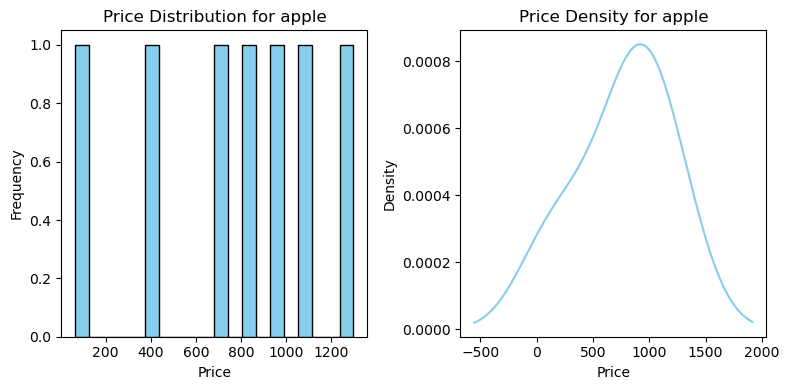

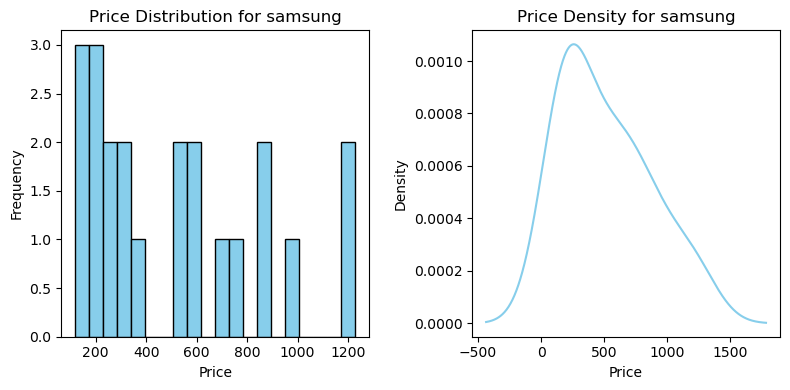

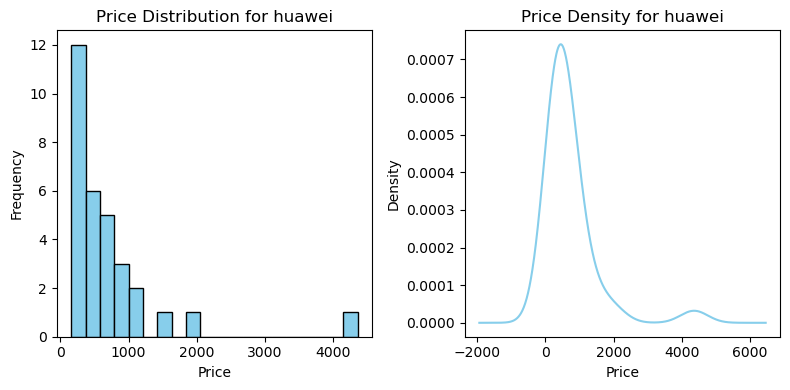

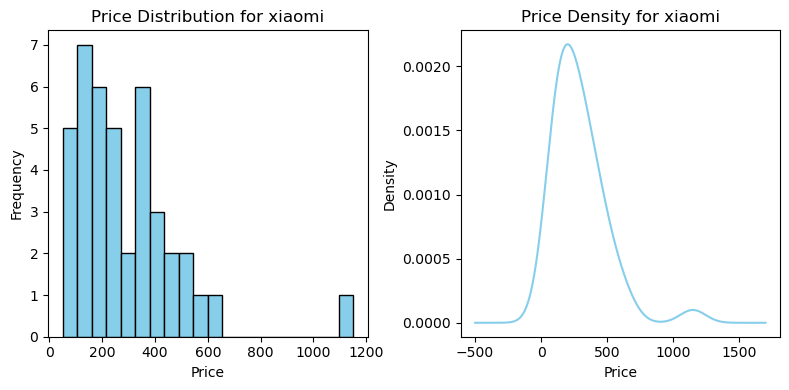

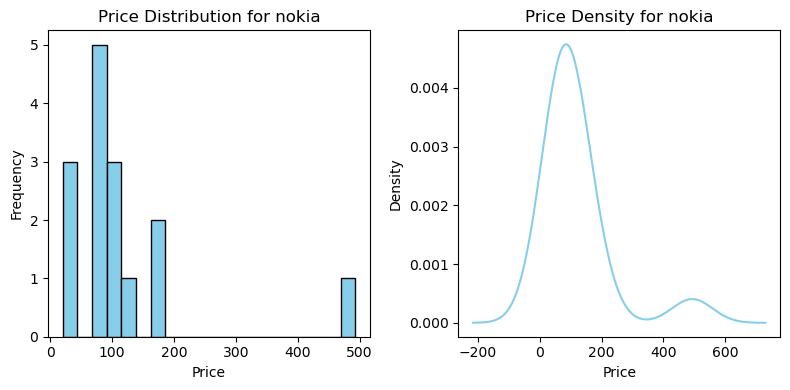

In [8]:
for brand in selected_brands:
    brand_data = filtered_df[filtered_df['brand'] == brand]
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(brand_data['Price'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Price Distribution for {brand}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    brand_data['Price'].plot(kind='kde', color='skyblue')
    plt.title(f'Price Density for {brand}')
    plt.xlabel('Price')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

### Estimation of Total Average

In [9]:
import scipy.stats as stats

alpha = 0.02

confidence_intervals = {}
for brand in selected_brands:
    data = filtered_df[filtered_df['brand'] == brand]['Price']
    sem = data.sem()  # standard error of the mean
    confidence_intervals[brand] = stats.t.interval(1 - alpha, len(data) - 1, loc=data.mean(), scale=sem)

#### Extra note : SEM

$$
\text{SEM} = \frac{s}{\sqrt{n}}
$$


where \( s \) represents the standard deviation of the sample, and \( n \) represents the sample size.

## Answers:

In [10]:
for brand, interval in confidence_intervals.items():
    print(f"98% Confidence Intervals for {brand}:")
    print(f"{interval[0]:.2f}       {interval[1]:.2f}\n")

98% Confidence Intervals for apple:
271.02       1264.88

98% Confidence Intervals for samsung:
324.03       701.83

98% Confidence Intervals for huawei:
350.14       1054.83

98% Confidence Intervals for xiaomi:
212.46       367.22

98% Confidence Intervals for nokia:
38.94       192.04

